# 1. 머신러닝 프로세스

# 2. 분류문제 : 로지스틱 회귀분석

In [74]:
import pandas as pd
data = pd.read_csv('breast-cancer-wisconsin.csv')
data.head()

,code,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [75]:
data['Class'].value_counts()

0    444
1    239
Name: Class, dtype: int64

In [76]:
print(data.shape)

(683, 11)


## 1단계 : X와 y 불러오기

In [77]:
X1 = data[['Clump_Thickness','Cell_Size','Cell_Shape','Marginal_Adhesion','Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses']]

In [78]:
X1

,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1
679,2,1,1,1,2,1,1,1,1
680,5,10,10,3,7,3,8,10,2
681,4,8,6,4,3,4,10,6,1


In [79]:
X2 = data[1:10]
X2

,code,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0
5,1017122,8,10,10,8,7,10,9,7,1,1
6,1018099,1,1,1,1,2,10,3,1,1,0
7,1018561,2,1,2,1,2,1,3,1,1,0
8,1033078,2,1,1,1,2,1,1,1,5,0
9,1033078,4,2,1,1,2,1,2,1,1,0


In [80]:
X3 = data.loc[:,'Clump_Thickness':'Mitoses']
X3

,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1
679,2,1,1,1,2,1,1,1,1
680,5,10,10,3,7,3,8,10,2
681,4,8,6,4,3,4,10,6,1


In [81]:
y = data[['Class']]
y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
678,0
679,0
680,1
681,1


## 2.train-test 데이터셋 나누기

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X1,y,random_state=42,stratify = y)

In [83]:
print(y_train.mean())

Class    0.349609
dtype: float64


## 3.정규화

In [84]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

In [85]:
scaler_minmax.fit(X_train)

MinMaxScaler()

In [86]:
X_scaled_minmax_train = scaler_minmax.transform(X_train)

In [87]:
scaler_standard.fit(X_train)
X_scaled_standard_train = scaler_standard.transform(X_train)

In [88]:
pd.DataFrame(X_scaled_minmax_train).describe()

,0,1,2,3,4,5,6,7,8
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,0.372830,0.231988,0.242839,0.205078,0.241319,0.285590,0.269314,0.199002,0.067491
std,0.317836,0.334781,0.332112,0.319561,0.242541,0.404890,0.265289,0.331503,0.190373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.111111,0.000000,0.000000
50%,0.333333,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000
75%,0.555556,0.361111,0.444444,0.333333,0.333333,0.583333,0.444444,0.222222,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [89]:
pd.DataFrame(X_scaled_standard_train).describe()

,0,1,2,3,4,5,6,7,8
count,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02
mean,-1.548241e-16,-1.543904e-16,-1.353084e-16,1.149254e-16,5.767956e-17,1.674008e-16,-2.775558e-17,-3.642919e-17,6.938894e-18
std,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00
min,-1.174173e+00,-6.936309e-01,-7.319088e-01,-6.423777e-01,-9.959361e-01,-7.060427e-01,-1.016165e+00,-6.008881e-01,-3.548677e-01
25%,-8.242452e-01,-6.936309e-01,-7.319088e-01,-6.423777e-01,-5.373756e-01,-7.060427e-01,-5.969255e-01,-6.008881e-01,-3.548677e-01
50%,-1.243886e-01,-6.936309e-01,-7.319088e-01,-6.423777e-01,-5.373756e-01,-7.060427e-01,-1.776856e-01,-6.008881e-01,-3.548677e-01
75%,5.754680e-01,3.860715e-01,6.076347e-01,4.017410e-01,3.797454e-01,7.360871e-01,6.607941e-01,7.011454e-02,-3.548677e-01
max,1.975181e+00,2.296314e+00,2.282064e+00,2.489978e+00,3.131108e+00,1.766180e+00,2.756993e+00,2.418624e+00,4.903108e+00


In [90]:
X_scaled_minmax_test =scaler_minmax.transform(X_test)
X_scaled_standard_test =scaler_standard.transform(X_test)

## 4. 모델학습

In [91]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [92]:
model.fit(X_scaled_minmax_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [93]:
model.predict(X_scaled_minmax_train)

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,

In [94]:
model.coef_

array([[2.53751836, 1.74500838, 1.95177858, 1.38175294, 1.11945193,
        3.28967038, 1.40328097, 1.21451707, 1.1424322 ]])

In [95]:
pred_train = model.predict(X_scaled_minmax_train)
model.score(X_scaled_minmax_train,y_train)

0.97265625

In [96]:
pred_test = model.predict(X_scaled_minmax_test)
model.score(X_scaled_minmax_test,y_test)

0.9590643274853801

In [97]:
from sklearn.metrics import confusion_matrix

In [98]:
confusion_train =confusion_matrix(y_train,pred_train)
print("훈련데이터 오차행렬 :\n",confusion_train)

훈련데이터 오차행렬 :
 [[328   5]
 [  9 170]]


In [99]:
from sklearn.metrics import classification_report
cfreport =classification_report(y_train,pred_train)
print("분류예측 리포트 :\n",cfreport)

분류예측 리포트 :
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       333
           1       0.97      0.95      0.96       179

    accuracy                           0.97       512
   macro avg       0.97      0.97      0.97       512
weighted avg       0.97      0.97      0.97       512



In [100]:
confusion_test =confusion_matrix(y_test,pred_test)
print("훈련데이터 오차행렬 :\n",confusion_test)

훈련데이터 오차행렬 :
 [[106   5]
 [  2  58]]


In [101]:
cfreport2 =classification_report(y_test,pred_test)
print("분류예측 리포트 :\n",cfreport2)

분류예측 리포트 :
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       111
           1       0.92      0.97      0.94        60

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [102]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

In [103]:
FP, TP, thresholds = roc_curve(y_test,model.decision_function(X_scaled_minmax_test))

In [104]:
roc_auc = metrics.roc_auc_score(y_test,model.decision_function(X_scaled_minmax_test))

In [105]:
roc_auc

0.9923423423423423

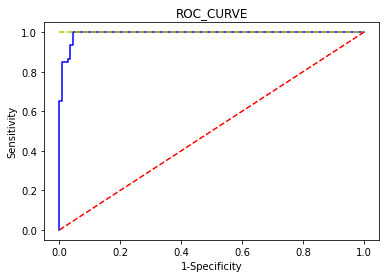

In [106]:
import matplotlib.pyplot as plt
plt.title("ROC_CURVE")
plt.xlabel("1-Specificity")
plt.ylabel("Sensitivity")

plt.plot(FP,TP,'b',label="Model (AUC=%0.2f)" %roc_auc)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

In [107]:
y_train

,Class
131,0
6,0
0,0
269,0
56,1
...,...
515,1
216,1
312,1
11,0


In [108]:
prob_train=model.predict_proba(X_scaled_minmax_train)
y_train[['y_pred']]=pred_train
y_train[['y_prob0', 'y_prob1']]=prob_train
y_train

C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
<ipython-input-108-d4a81cdfe343>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train[['y_pred']]=pred_train
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

,Class,y_pred,y_prob0,y_prob1
131,0,0,0.981014,0.018986
6,0,0,0.768191,0.231809
0,0,0,0.966431,0.033569
269,0,0,0.988880,0.011120
56,1,1,0.203161,0.796839
...,...,...,...,...
515,1,1,0.021270,0.978730
216,1,0,0.895961,0.104039
312,1,1,0.113440,0.886560
11,0,0,0.987405,0.012595


In [109]:
prob_test=model.predict_proba(X_scaled_minmax_test)
y_test[['y_pred']]=pred_test
y_test[['y_prob0', 'y_prob1']]=prob_test
y_test

C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
<ipython-input-109-5d31d4894746>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test[['y_pred']]=pred_test
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

,Class,y_pred,y_prob0,y_prob1
541,0,0,0.955893,0.044107
549,0,0,0.970887,0.029113
318,0,0,0.943572,0.056428
183,0,0,0.979370,0.020630
478,1,1,0.001305,0.998695
...,...,...,...,...
425,1,1,0.006201,0.993799
314,1,1,0.067440,0.932560
15,1,1,0.436887,0.563113
510,0,0,0.983410,0.016590


In [110]:
Total_test = pd.concat([X_test,y_test],axis=1)
Total_test

,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class,y_pred,y_prob0,y_prob1
541,5,2,2,2,1,1,2,1,1,0,0,0.955893,0.044107
549,4,1,1,1,2,1,3,2,1,0,0,0.970887,0.029113
318,5,2,2,2,2,1,2,2,1,0,0,0.943572,0.056428
183,1,2,3,1,2,1,3,1,1,0,0,0.979370,0.020630
478,5,10,10,10,6,10,6,5,2,1,1,0.001305,0.998695
...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,10,4,3,10,4,10,10,1,1,1,1,0.006201,0.993799
314,8,10,3,2,6,4,3,10,1,1,1,0.067440,0.932560
15,7,4,6,4,6,1,4,3,1,1,1,0.436887,0.563113
510,3,1,1,2,2,1,1,1,1,0,0,0.983410,0.016590


In [ ]:
Total_test.to_csv('classification.csv')

# 3. 회귀 문제 : 선형회귀분석

In [112]:
import pandas as pd

data=pd.read_csv('house_price.csv')
data.head()

,housing_age,income,bedrooms,households,rooms,house_value
0,23,6.7770,0.141112,2.442244,8.103960,500000
1,49,6.0199,0.160984,2.726688,5.752412,500000
2,35,5.1155,0.249061,1.902676,3.888078,500000
3,32,4.7109,0.231383,1.913669,4.508393,500000
4,21,4.5625,0.255583,3.092664,4.667954,500000


In [113]:
data.shape

(17689, 6)

In [117]:
data.describe()

,housing_age,income,bedrooms,households,rooms,house_value
count,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000
mean,27.378823,3.671141,0.213278,2.952117,5.244001,189043.439313
std,11.280230,1.525937,0.051167,0.731573,1.184922,95487.122628
min,1.000000,0.499900,0.100000,0.750000,1.640000,14999.000000
25%,18.000000,2.532900,0.177464,2.470270,4.426829,114400.000000
50%,28.000000,3.453900,0.204104,2.854962,5.190779,171100.000000
75%,36.000000,4.591800,0.240157,3.316092,5.953728,242700.000000
max,51.000000,9.905500,0.498127,6.954023,11.901869,500000.000000


array([[<AxesSubplot:title={'center':'housing_age'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'households'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'house_value'}>]], dtype=object)

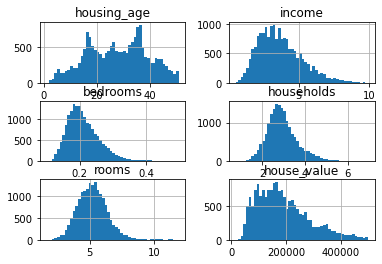

In [118]:
data.hist(bins=50)

In [119]:
X2 = data[data.columns[0:5]]

In [120]:
y=data[['house_value']]

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X2,y,random_state=42)

In [123]:
print(y_train.mean())
print(y_test.mean())

house_value    189260.967812
dtype: float64
house_value    188391.001357
dtype: float64


In [124]:
from sklearn.preprocessing import MinMaxScaler
scaler_mm = MinMaxScaler()
scaler_mm.fit(X_train)
X_scaled_mm_train = scaler_mm.transform(X_train)

In [125]:
pd.DataFrame(X_scaled_mm_train).describe()

,0,1,2,3,4
count,13266.000000,13266.000000,13266.000000,13266.000000,13266.000000
mean,0.526774,0.337157,0.284682,0.357657,0.335256
std,0.224853,0.161972,0.129011,0.118029,0.117614
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.340000,0.217083,0.194600,0.280091,0.254470
50%,0.540000,0.313983,0.261866,0.342512,0.330405
75%,0.700000,0.435921,0.352555,0.416829,0.405879
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [126]:
X_scaled_mm_test = scaler_mm.transform(X_test)

In [127]:
pd.DataFrame(X_scaled_mm_test).describe()

,0,1,2,3,4
count,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000
mean,0.529984,0.337189,0.284061,0.362482,0.338222
std,0.227852,0.163047,0.127044,0.122663,0.119826
min,0.000000,0.000000,0.044099,0.051525,-0.023437
25%,0.340000,0.213011,0.194452,0.281143,0.254633
50%,0.540000,0.314536,0.260169,0.344791,0.331819
75%,0.700000,0.433109,0.351367,0.424120,0.410090
max,1.000000,0.992462,0.975243,1.011026,0.998799


In [129]:
from sklearn.preprocessing import StandardScaler
scaler_ss = StandardScaler()
scaler_ss.fit(X_train)
X_scaled_ss_train = scaler_ss.transform(X_train)
X_scaled_ss_test = scaler_ss.transform(X_test)


In [130]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_scaled_mm_train,y_train)

LinearRegression()

In [131]:
pred_train = model.predict(X_scaled_mm_train)

In [132]:
model.score(X_scaled_mm_train,y_train)

0.5706921210926263

In [133]:
pred_test = model.predict(X_scaled_mm_test)
model.score(X_scaled_mm_test,y_test)

0.5826083517811866

In [134]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,pred_test)
MSE

3814773021.7308254

In [135]:
import numpy as np
np.sqrt(MSE)

61763.84882543206

In [136]:
pred_test

array([[ 33552.69402673],
       [266109.59646457],
       [212922.50030676],
       ...,
       [288121.57009259],
       [151766.95866953],
       [191185.78163942]])

In [137]:
y_test['predict'] = pred_test
y_test

<ipython-input-137-e833c418753c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['predict'] = pred_test


,house_value,predict
17552,48500,33552.694027
5659,220500,266109.596465
5954,215800,212922.500307
733,390000,290337.891760
10290,155200,135785.644577
...,...,...
7770,185300,262949.818829
1822,328900,226451.743868
811,382400,288121.570093
868,377300,151766.958670


In [140]:
Total_test = pd.concat([X_test,y_test],axis=1)
Total_test

,housing_age,income,bedrooms,households,rooms,house_value,predict
17552,19,1.0481,0.251874,3.670846,4.181818,48500,33552.694027
5659,26,5.8683,0.132936,2.730483,7.172862,220500,266109.596465
5954,37,4.1094,0.177939,2.652582,5.830986,215800,212922.500307
733,16,6.3258,0.169569,3.155340,6.412621,390000,290337.891760
10290,32,2.2950,0.293907,4.188742,3.695364,155200,135785.644577
...,...,...,...,...,...,...,...
7770,34,5.5238,0.169824,3.451264,5.335740,185300,262949.818829
1822,19,3.8819,0.226279,1.897600,4.755200,328900,226451.743868
811,40,5.7143,0.148075,2.704819,6.102410,382400,288121.570093
868,16,2.6250,0.229714,1.910828,5.573248,377300,151766.958670


In [ ]:
Total_test.to_csv('Regression.csv')